In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import sys 
import urllib
import urllib.request
import streamlit as st

(4182, 17) (738, 17) (4182,) (738,)
['Menorrhagia' 'Menstural disorder' "Asherman's Syndrome" 'Endometriosis'
 'Peptic ulcer diseae' "Asherman's Syndrome"
 'Premenstrual Dysphoric Disorder (PMDD)' 'Mittelschmerz' 'Arthritis'
 'Cervical Dysplasia' 'Hyperthyroidism' 'Cervical spondylosis' 'Vaginitis'
 'Menorrhagia' 'Allergy' 'Gastroenteritis' 'Menstural disorder'
 'Hemorrhagic Ovarian Cysts' 'Drug Reaction' 'Acne' 'Cervical spondylosis'
 'Luteal Phase Deficiency' 'Premenstrual Dysphoric Disorder (PMDD)'
 'Dimorphic hemmorhoids(piles)' 'Premature Ovarian Insufficiency (POI)'
 'Luteal Phase Deficiency' '(vertigo) Paroymsal  Positional Vertigo'
 'Cervical Dysplasia' 'Drug Reaction' 'Alcoholic hepatitis' 'Menorrhagia'
 'Ovarian Cysts' 'Thyroid Disorders' 'Allergy' 'Endometriosis'
 'Peptic ulcer diseae' 'Premenopausal Osteoporosis' 'Cervical Dysplasia'
 'Thyroid Disorders' 'Dysfunctional Uterine Bleeding (DUB)' 'Impetigo'
 'Cervical spondylosis' 'Dysfunctional Uterine Bleeding (DUB)'
 'Uterin

2024-03-16 15:37:57.740 
  command:

    streamlit run C:\Users\Rashi Gupta\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


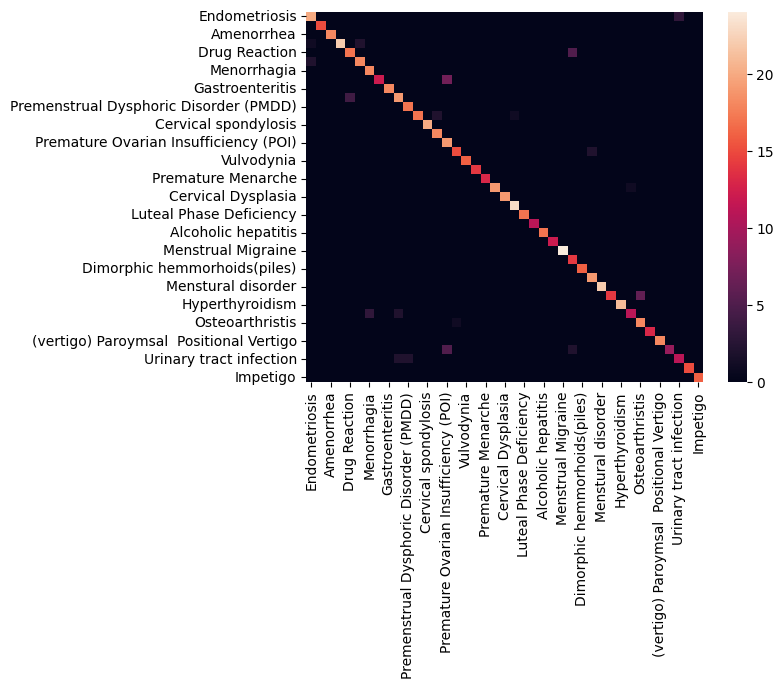

In [2]:
df = pd.read_csv('datasett.csv')
#print(df.head())
#df.describe()
df1 = pd.read_csv('Symptom-severity.csv')
#print(df1.head())
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)

vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)

(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

def predict():
    Button=st.button("Predict")
    if Button:
        c=st.container()
        c.write(SVM(Symptom1,Symptom2,Symptom3,Symptom4,Symptom5))

def SVM(Symptom1,Symptom2,Symptom3,Symptom4,Symptom5):
    psymptoms = [Symptom1,Symptom2,Symptom3,Symptom4,Symptom5]
    
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    nulls = [0,0,0,0,0,0,0,0,0,0,0,0]
    psy = [psymptoms + nulls]

    pred2 = model.predict(psy)
    return pred2[0]

OPTIONS = symptoms
st.title("Disease Prediction System")
st.write("Predict disease from symptoms")
Symptom1=st.selectbox(label="Symptom 1",options=OPTIONS)
Symptom2=st.selectbox(label="Symptom 2",options=OPTIONS)
Symptom3=st.selectbox(label="Symptom 3",options=OPTIONS)
Symptom4=st.selectbox(label="Symptom 4",options=OPTIONS)
Symptom5=st.selectbox(label="Symptom 5",options=OPTIONS)

predict()